In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [74]:
test = pd.read_csv('house_price_pred_testdata.csv')
train = pd.read_csv('house_price_pred_trainingdata.csv')

In [11]:
train.shape

(1459, 80)

In [12]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
# Finding column data types 

train.dtypes.sort_values(ascending=False)

HeatingQC        object
CentralAir       object
ExterCond        object
KitchenQual      object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Electrical       object
SaleCondition    object
Neighborhood     object
Heating          object
Exterior2nd      object
MasVnrType       object
BsmtFinType2     object
ExterQual        object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
Functional       object
Condition1       object
FireplaceQu      object
PavedDrive       object
SaleType         object
MSZoning         object
MiscFeature      object
Fence            object
                  ...  
MSSubClass        int64
SalePrice         int64
BsmtFinSF1        int64
BsmtFinSF2        int64
YrSold            int64
MoSold            int64
MiscVal           int64
PoolArea          int64
ScreenPorch       int64
3SsnPorch         int64
EnclosedPorch   

In [19]:
# Let's check out for the missing values in our dataset

train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [23]:
train['SalePrice'].count()

1460

In [58]:
# Let's check the percentage of missing values in our dataset

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train['SalePrice'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [64]:
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [70]:
missing_column_train = missing_data[missing_data['Total']>0].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [71]:
missing_column_train

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [72]:
train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [81]:
train['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [83]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [91]:
# Let's check out the unique values in all categorical features

for i in missing_column_train:
    if(train[i].dtype == 'object'):
        print('Unique values for column : ', i,' : ',train[i].unique())

Unique values for column :  PoolQC  :  [nan 'Ex' 'Fa' 'Gd']
Unique values for column :  MiscFeature  :  [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Unique values for column :  Alley  :  [nan 'Grvl' 'Pave']
Unique values for column :  Fence  :  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Unique values for column :  FireplaceQu  :  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Unique values for column :  GarageCond  :  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Unique values for column :  GarageType  :  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Unique values for column :  GarageFinish  :  ['RFn' 'Unf' 'Fin' nan]
Unique values for column :  GarageQual  :  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Unique values for column :  BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av' nan]
Unique values for column :  BsmtFinType2  :  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unique values for column :  BsmtFinType1  :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Unique values for column :  BsmtCond  :  ['TA' 'Gd' nan 'Fa' 'Po']
Unique values for co

In [101]:
# Let's check out the unique values in all numerical features to check 
#is any ordinal feature in form of numeriacl feature is present or not

for i in missing_column_train:
    if(train[i].dtype != 'object' ):
        print('Unique values for column : ', i,' : ',train[i].unique())

Unique values for column :  LotFrontage  :  [  65.   80.   68.   60.   84.   85.   75.   nan   51.   50.   70.   91.
   72.   66.  101.   57.   44.  110.   98.   47.  108.  112.   74.  115.
   61.   48.   33.   52.  100.   24.   89.   63.   76.   81.   95.   69.
   21.   32.   78.  121.  122.   40.  105.   73.   77.   64.   94.   34.
   90.   55.   88.   82.   71.  120.  107.   92.  134.   62.   86.  141.
   97.   54.   41.   79.  174.   99.   67.   83.   43.  103.   93.   30.
  129.  140.   35.   37.  118.   87.  116.  150.  111.   49.   96.   59.
   36.   56.  102.   58.   38.  109.  130.   53.  137.   45.  106.  104.
   42.   39.  144.  114.  128.  149.  313.  168.  182.  138.  160.  152.
  124.  153.   46.]
Unique values for column :  GarageYrBlt  :  [ 2003.  1976.  2001.  1998.  2000.  1993.  2004.  1973.  1931.  1939.
  1965.  2005.  1962.  2006.  1960.  1991.  1970.  1967.  1958.  1930.
  2002.  1968.  2007.  2008.  1957.  1920.  1966.  1959.  1995.  1954.
  1953.    nan  1983. 

In [102]:
# One column we can obviously drop is 'Id'

train_ = train.drop(['Id'],axis=1)
test_ = test.drop(['Id'],axis=1)


In [103]:
train_.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [104]:
# Define how to fill the missing value

def missing_values(df,df2):
    
    for column in df2:
        if (df[column].isnull().sum()) >0:
            print(column +" has missing values type : "+ str(df[column].dtype))
            if df[column].dtype in ('int64','float64'):
                df[column] = df[column].fillna(df[column].mean())
            else:
                if column in ['Electrical','MasVnrType']:
                    df[column] = df[column].fillna(df[column].dropna().mode()[0])
                else:
                    df[column] = df[column].fillna('NAN')

In [137]:
# Filling the missing values in train dataset

missing_values(train_,missing_column_train)
missing_values(t,missing_column_train)

PoolQC has missing values type : object
MiscFeature has missing values type : object
Alley has missing values type : object
Fence has missing values type : object
FireplaceQu has missing values type : object
LotFrontage has missing values type : float64
GarageCond has missing values type : object
GarageType has missing values type : object
GarageYrBlt has missing values type : float64
GarageFinish has missing values type : object
GarageQual has missing values type : object
BsmtExposure has missing values type : object
BsmtFinType2 has missing values type : object
BsmtFinType1 has missing values type : object
BsmtCond has missing values type : object
BsmtQual has missing values type : object
MasVnrArea has missing values type : float64
MasVnrType has missing values type : object


In [129]:
train_['PoolQC'].value_counts()

NAN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [130]:
train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [133]:
train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [135]:
#check the change in count

train_['MasVnrArea'].describe()

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [143]:
missing_test=test_.isnull().sum().sort_values(ascending=False)
test_missing_data = pd.concat([missing_test], axis=1, keys=['Total_missing'])
test_missing_data[test_missing_data['Total_missing']>0]

,Total_missing
MSZoning,4
Functional,2
BsmtFullBath,2
Utilities,2
BsmtHalfBath,2
KitchenQual,1
BsmtFinSF1,1
Exterior1st,1
Exterior2nd,1
GarageCars,1


In [148]:
# Let's check out the unique values in all numerical features to check 
#is any ordinal feature in form of numeriacl feature is present or not in test features

for i in test_missing_data[test_missing_data['Total_missing']>0].index:
    if (test[i].dtype != 'object' and len(test[i].unique())<=10):
        print(' Unique values in {} feature are {}'.format(i,test[i].unique()))


 Unique values in BsmtFullBath feature are [  0.   1.   2.   3.  nan]
 Unique values in BsmtHalfBath feature are [  0.   1.  nan   2.]
 Unique values in GarageCars feature are [  1.   2.   3.   0.   4.   5.  nan]


In [149]:
# Let's check out the unique values in all categorical features in test dataset

for i in test_missing_data[test_missing_data['Total_missing']>0].index:
    if (test[i].dtype == 'object'):
        print(' Unique values in {} feature are {} \n'.format(i,test[i].unique()))


 Unique values in MSZoning feature are ['RH' 'RL' 'RM' 'FV' 'C (all)' nan] 

 Unique values in Functional feature are ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan] 

 Unique values in Utilities feature are ['AllPub' nan] 

 Unique values in KitchenQual feature are ['TA' 'Gd' 'Ex' 'Fa' nan] 

 Unique values in Exterior1st feature are ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock'] 

 Unique values in Exterior2nd feature are ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone'] 

 Unique values in SaleType feature are ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan] 



In [150]:
# now fill rest missing values in test dataset

def missing_values_test(df):
    
    for column in df:
        if (df[column].isnull().sum()) >0:
            print(column +" has missing values type : "+ str(df[column].dtype))
            if ((df[column].dtype in ('int64','float64')) and (column not in['BsmtFullBath','BsmtHalfBath','GarageCars'])):
                df[column] = df[column].fillna(df[column].mean())
            else:
                df[column] = df[column].fillna(df[column].dropna().mode()[0])

In [151]:
missing_values_test(test_)

MSZoning has missing values type : object
Utilities has missing values type : object
Exterior1st has missing values type : object
Exterior2nd has missing values type : object
BsmtFinSF1 has missing values type : float64
BsmtFinSF2 has missing values type : float64
BsmtUnfSF has missing values type : float64
TotalBsmtSF has missing values type : float64
BsmtFullBath has missing values type : float64
BsmtHalfBath has missing values type : float64
KitchenQual has missing values type : object
Functional has missing values type : object
GarageCars has missing values type : float64
GarageArea has missing values type : float64
SaleType has missing values type : object


In [153]:
# Some infromation about target vaiable

train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

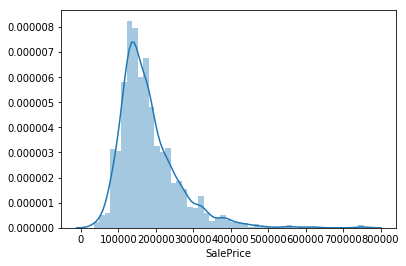

In [161]:
# Check for skewness: Plot a histogram of target feature

sns.distplot(train['SalePrice'])

#Kde is by default True : gaussian kernel density estimate.

#We clearly observed target is positively skewed. When performing regression, 
#Sometimes it makes sense to log-transform the target variable when it is skewed. 
#One reason for this is to improve the linearity of the data



In [163]:
# calculate skewness of target feature

print ("The skewness of SalePrice is ",(train['SalePrice'].skew()))


The skewness of SalePrice is  1.88287575977


Skewness is 0.121335062205


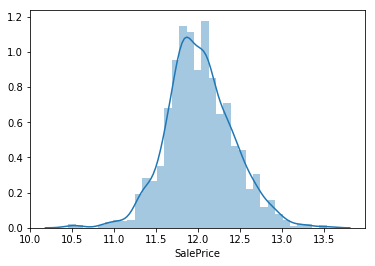

In [164]:
# Transform the the target feature and check the skewness

target = np.log(train['SalePrice'])
print ('Skewness is', target.skew())
sns.distplot(target)

In [169]:
# seperate out the Categorical and Numerical features

numerical_feature=train_.dtypes[train.dtypes!= 'object'].index
categorical_feature=train_.dtypes[train.dtypes== 'object'].index

print ("There are {} numeric and {} categorical columns in train data".format(numerical_feature.shape[0],categorical_feature.shape[0]))


There are 37 numeric and 43 categorical columns in train data


In [171]:
numerical_feature.shape

(37,)

In [177]:
# Correlation heatmap

corr=train_[numerical_feature].corr()
corr.shape
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


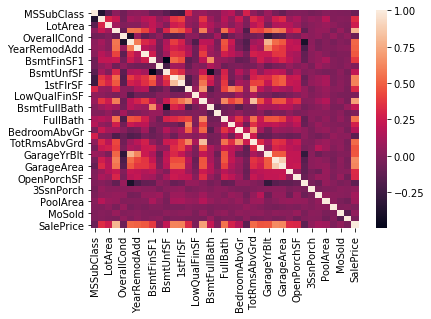

In [175]:
sns.heatmap(corr)

In [182]:
# Let's check the first ten features are the most positively correlated with SalePrice and 
# the next ten are the most negatively correlated.

#print(corr['SalePrice'])

print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-10:]) #last 10 values`

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

----------------------
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


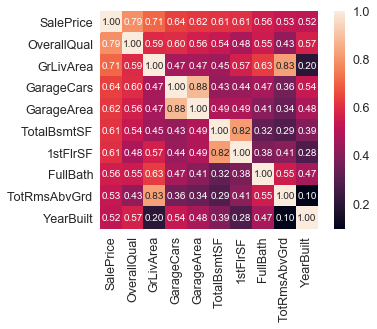

In [183]:
#saleprice correlation matrix

k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [184]:
'''

GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. We'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
'TotalBsmtSF' and '1stFloor' also seem to be twin brothers.
'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.

'''

# Dropping the twin brothers

train_ = train_.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis=1)
test_ = test_.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis=1)

# Dropping the twin brothers from numerical_feature too

numerical_feature = numerical_feature.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'])

In [186]:
train_['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [191]:
'''
It ranges from 1-10. So, it can be treated as a oridnal feature.
Let's check the median sale price of houses with respect to OverallQual. You might be wondering, why median ? We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.
We can create such aggregated tables using pandas pivot tables quite easily.

'''

#let's check the mean price per quality and plot it.

pivot = train_.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot.sort_values

<bound method DataFrame.sort_values of              SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390>

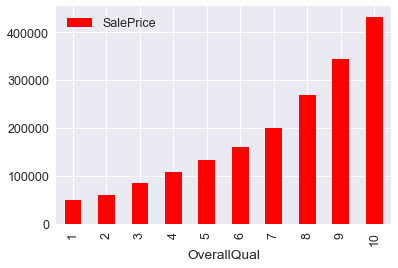

In [192]:
#visualize this pivot table more easily, we can create a bar plot

pivot.plot(kind='bar', color='red')

'''
This behavior is quite normal. As the overall quality of a house increases, its sale price also increases.

'''

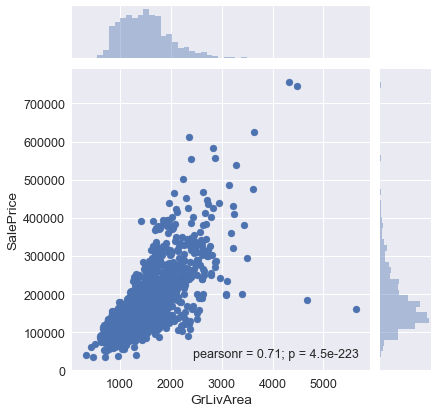

In [196]:
#Let's visualize the next correlated variable GrLivArea and understand their behavior.

sns.jointplot(x=train_['GrLivArea'], y=train['SalePrice'])#kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional

#As seen above, here also we see a direct correlation of living area with sale price. However, 
#we can spot an outlier value GrLivArea > 5000.

Correlation between SalePrice and TotalBsmtSF: 0.6135805515591944


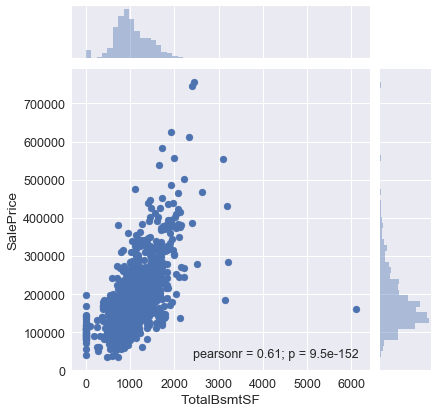

In [197]:
# TotalBsmtSF variable

sns.jointplot(x=train_['TotalBsmtSF'], y=train['SalePrice'])
print('Correlation between SalePrice and TotalBsmtSF: {}'.format(corr['SalePrice']['TotalBsmtSF']))
#Correlation behaviour can easiy be seen and the outlier for an value TotalBsmtSF> 5000

In [203]:
# Fullbath variable

pivot2 = train_.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.median)
pivot2.sort_values

<bound method DataFrame.sort_values of           SalePrice
FullBath           
0            145000
1            132375
2            196750
3            320000>

Correlation between SalePrice and FullBath: 0.5606637627484452


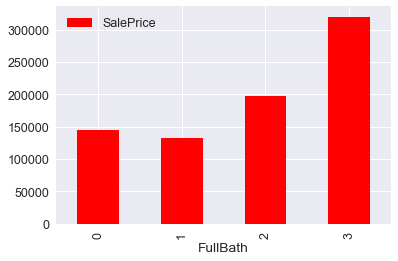

In [204]:
#visualize this pivot table more easily, we can create a bar plot

pivot2.plot(kind='bar', color='red')
print('Correlation between SalePrice and FullBath: {}'.format(corr['SalePrice']['FullBath']))

In [205]:
# info about categorical features

train_[categorical_feature].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,NAN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NAN,NAN,NAN,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

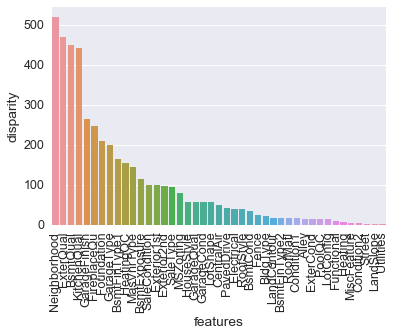

In [206]:
#Now, we'll define a function which calculates p values. From those p values, we'll calculate a disparity score. 
#Higher the disparity score, better the feature in predicting sale price.

cat = [f for f in train_.columns if train_.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data= train_[categorical_feature]
cat_data['SalePrice'] = train_.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

In [207]:
k

,features,pval,disparity
8,Neighborhood,1.558600e-225,517.637858
18,ExterQual,1.439551e-204,469.363028
21,BsmtQual,8.158548e-196,449.207612
30,KitchenQual,3.032213e-192,440.987045
34,GarageFinish,6.228747e-115,262.968110
32,FireplaceQu,2.971217e-107,245.287633
20,Foundation,5.791895e-91,207.778784
33,GarageType,6.117026e-87,198.513827
24,BsmtFinType1,2.386358e-71,162.613773
27,HeatingQC,2.667062e-67,153.292224


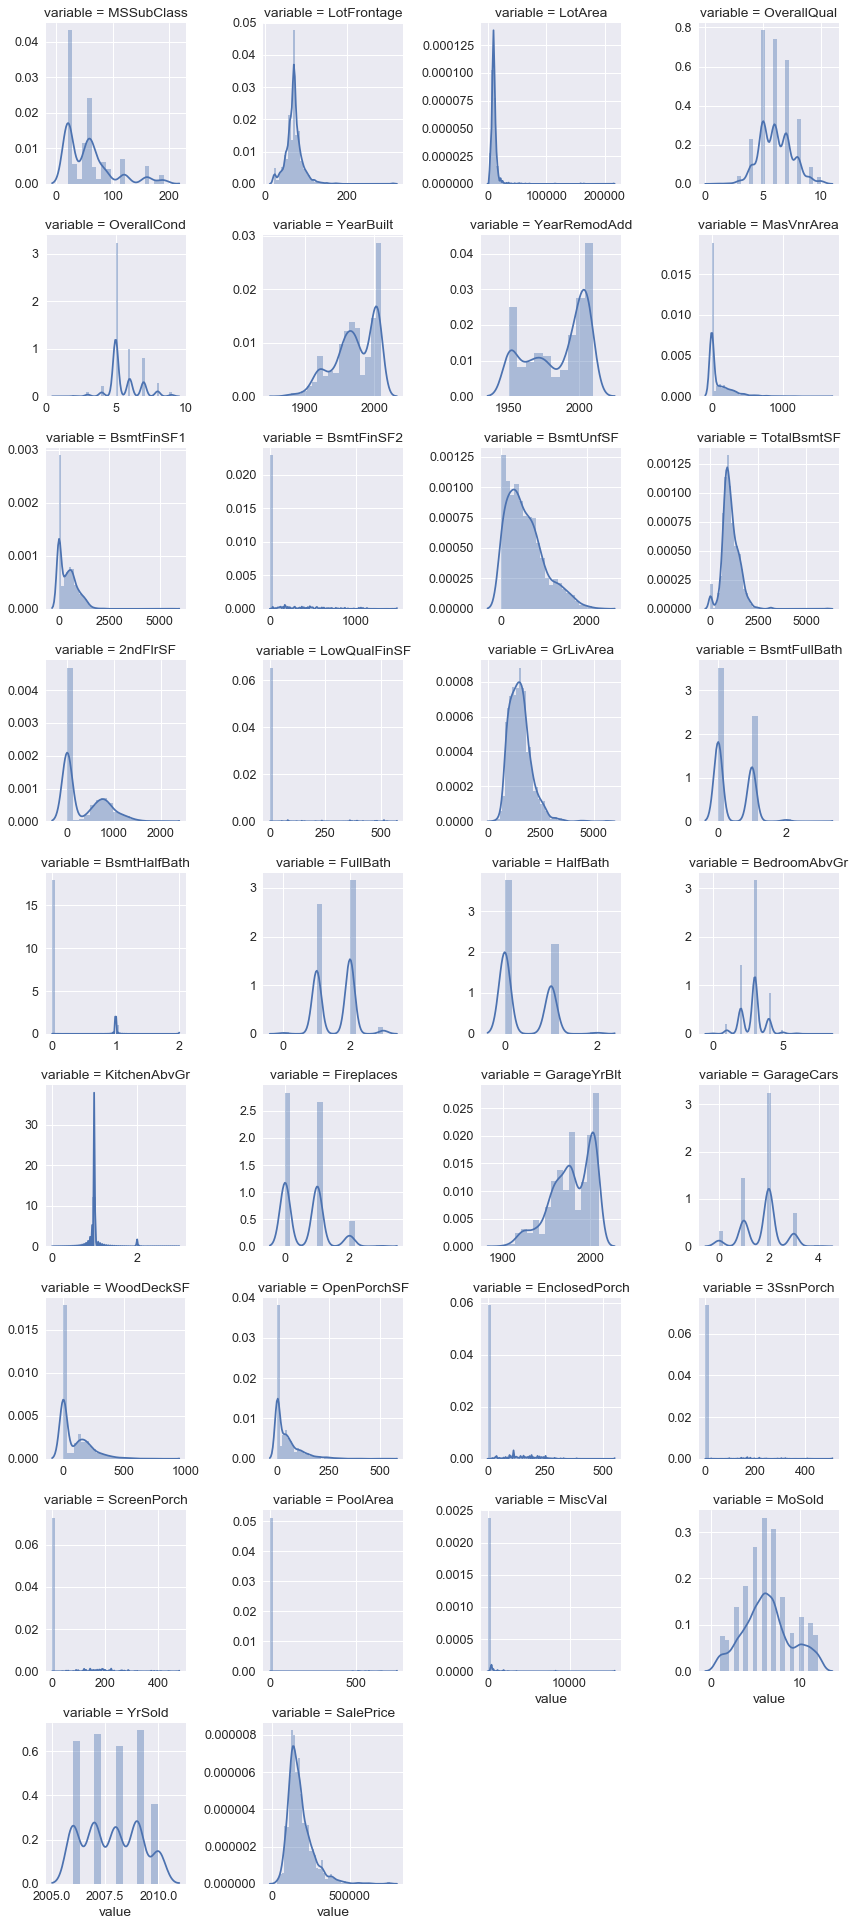

In [208]:
#Finally, to get a quick glimpse of all variables in a data set, let's plot histograms for all numeric variables to determine if all variables are skewed. 
#For categorical variables, we will create a boxplot and understand their nature.

num = [f for f in train_.columns if train_.dtypes[f] != 'object']
nd = pd.melt(train_, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

#We can see, most of the variables are right skewed. We'll have to transform them.



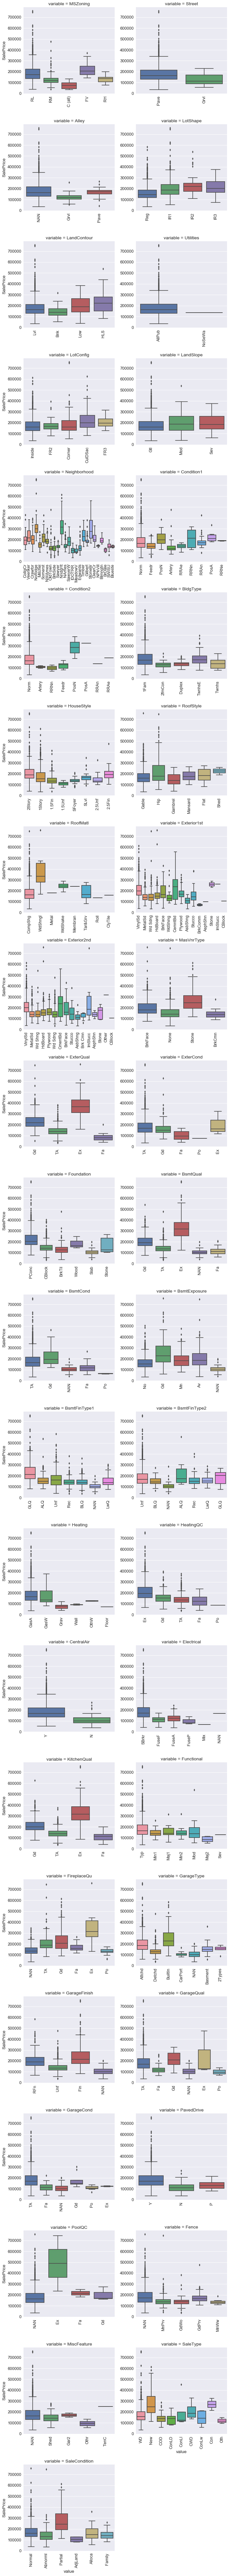

In [209]:

# let's create boxplots for visualizing categorical variables.

def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train_.columns if train_.dtypes[f] == 'object']

p = pd.melt(train_, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

#Here we can see that most of the variables possess outlier values

In [210]:
# we'll convert the categorical variables into ordinal variables

slope_mapping = {'Gtl': 3,'Mod': 2,'Sev': 1}

train_['LandSlope'] = train_['LandSlope'].map(slope_mapping)
test_['LandSlope'] = test_['LandSlope'].map(slope_mapping)

qual_mapping = {'Ex': 5,'Gd': 4,'TA': 3,'Fa':2,'Po':1,'NA':0,'NAN':0}


#train['ExterQual'] = train['ExterQual'].map(qual_mapping)
#test['ExterQual'] = test['ExterQual'].map(qual_mapping)

name=['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond']
for i in name:
    train_[i] = train_[i].map(qual_mapping)
    test_[i] = test_[i].map(qual_mapping)
    
expo_mapping = {'Gd': 4,'Av': 3,'Mn':2,'No':1,'Na':0,'NAN':0}

train_['BsmtExposure'] = train_['BsmtExposure'].map(expo_mapping)
test_['BsmtExposure'] = test_['BsmtExposure'].map(expo_mapping)

bsmt_mapping = {"Unf": 0, "LwQ": 1, "Rec": 2, "BLQ": 3, "ALQ": 4, "GLQ": 5,'NAN':0}

train_['BsmtFinType1'] = train_['BsmtFinType1'].map(bsmt_mapping)
test_['BsmtFinType1'] = test_['BsmtFinType1'].map(bsmt_mapping)

train_['BsmtFinType2'] = train_['BsmtFinType2'].map(bsmt_mapping)
test_['BsmtFinType2'] = test_['BsmtFinType2'].map(bsmt_mapping)

funct_mapping={"Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}

train_['Functional'] = train_['Functional'].map(funct_mapping)
test_['Functional'] = test_['Functional'].map(funct_mapping)

garage_mapping = { "Unf": 1, "RFn": 2, "Fin": 3,'NAN':0}

train_['GarageFinish'] = train_['GarageFinish'].map(garage_mapping)
test_['GarageFinish'] = test_['GarageFinish'].map(garage_mapping)

In [211]:
# To check the missing values,if any

train_.isnull().sum().sort_values(ascending=False).head(5)

SalePrice      0
ExterCond      0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64

In [212]:
# Let's check is there any ordinal feature present in numerical feature

num_cat=[]
for i in numerical_feature:
    if ( len(train_[i].unique())<=10):
        num_cat.append(i)
        print(' Unique values in {} feature are {}'.format(i,train_[i].unique()))

 Unique values in OverallQual feature are [ 7  6  8  5  9  4 10  3  1  2]
 Unique values in OverallCond feature are [5 8 6 7 4 2 3 9 1]
 Unique values in BsmtFullBath feature are [1 0 2 3]
 Unique values in BsmtHalfBath feature are [0 1 2]
 Unique values in FullBath feature are [2 1 3 0]
 Unique values in HalfBath feature are [1 0 2]
 Unique values in BedroomAbvGr feature are [3 4 1 2 0 5 6 8]
 Unique values in KitchenAbvGr feature are [1 2 3 0]
 Unique values in Fireplaces feature are [0 1 2 3]
 Unique values in GarageCars feature are [2 3 1 0 4]
 Unique values in PoolArea feature are [  0 512 648 576 555 480 519 738]
 Unique values in YrSold feature are [2008 2007 2006 2009 2010]


In [213]:
# convert PoolArea feature into ordinal feature

pool_mapping={0:0,480:1,512:2,519:3,555:4,576:5,648:6,738:7}

train_['PoolArea'] = train_['PoolArea'].map(pool_mapping)
test_['PoolArea'] = test_['PoolArea'].map(pool_mapping)


In [214]:
# add categorical features which are present in numerical feature

categorical_feature=categorical_feature.append(pd.Index(num_cat))
numerical_feature.shape


(34,)

In [215]:
# remove categorical feature from numerical feature

numerical_feature=numerical_feature.drop(num_cat)


In [216]:
# Transform the skewness of features

def log_skew(df,df2,num_feature):
    for column in df[num_feature]:
        if df[column].dtype in ('int64','float64'):
            old_skew = df[column].skew()
            if (old_skew) > 0.75:
                df[column]=df[column].apply(lambda x: np.log(x+1))
                df2[column]=df[column].apply(lambda x: np.log(x+1))
                print('the skewness of '+column+" is reduced from "+str(old_skew) + " to "+str(df[column].skew()))

In [217]:
log_skew(train_,test_,numerical_feature)

the skewness of MSSubClass is reduced from 1.40765674715 to 0.24899710961
the skewness of LotFrontage is reduced from 2.38495016794 to -0.891976734906
the skewness of LotArea is reduced from 12.2076878512 to -0.137404481228
the skewness of MasVnrArea is reduced from 2.67641178473 to 0.481120127056
the skewness of BsmtFinSF1 is reduced from 1.68550307191 to -0.618409817856
the skewness of BsmtFinSF2 is reduced from 4.25526110893 to 2.52369376417
the skewness of BsmtUnfSF is reduced from 0.920268452804 to -2.1865035797
the skewness of TotalBsmtSF is reduced from 1.52425454906 to -5.15466998352
the skewness of 2ndFlrSF is reduced from 0.813029816302 to 0.289643458064
the skewness of LowQualFinSF is reduced from 9.01134128847 to 7.46031651462
the skewness of GrLivArea is reduced from 1.36656035602 to -0.00614025348629
the skewness of WoodDeckSF is reduced from 1.54137575719 to 0.153536590209
the skewness of OpenPorchSF is reduced from 2.36434174037 to -0.0233972948574
the skewness of Enclo

In [218]:
# Let's standardize the numeric features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_[numerical_feature])
train_[numerical_feature] = scaler.transform(train_[numerical_feature])
test_[numerical_feature] = scaler.transform(test_[numerical_feature])